In [10]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [11]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [12]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default) or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset fol

In [ ]:
!cd OIDv4_ToolKit/ && python3 main.py downloader --Dataset ../ --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] 

Model qurish

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets
import os

# path
path = Path('train')

# Check if the training directory exists and is not empty
if not path.exists() or not any(path.iterdir()):
    print(f"Error: The '{path}' directory does not exist or is empty.")
    print("Please make sure you have run the image download cell (the 4th code cell) and that it completed successfully.")
    print(f"A '{path}' directory with subdirectories for each class (Car, Airplane, Boat) should be present in your project folder.")
else:
    fls = get_image_files(path)
    failed = verify_images(fls)
    print(f"Found {len(fls)} images in '{path}'.")
    if failed:
        print(f"Warning: Found {len(failed)} corrupted images. Deleting them.")
        failed.map(Path.unlink)

    # Datablock
    transport = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(224)
    )

    # Dataloader
    dls = transport.dataloaders(path)
    print("DataLoaders created successfully.")

    # o'qitish(train)
    learn = cnn_learner(dls, resnet34, metrics=accuracy)
    learn.fine_tune(4)

TypeError: 'NoneType' object is not iterable

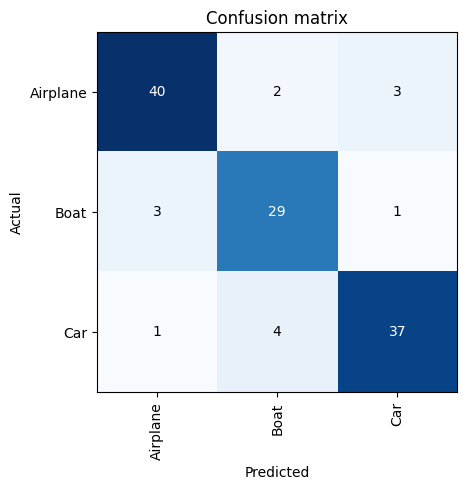

In [ ]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

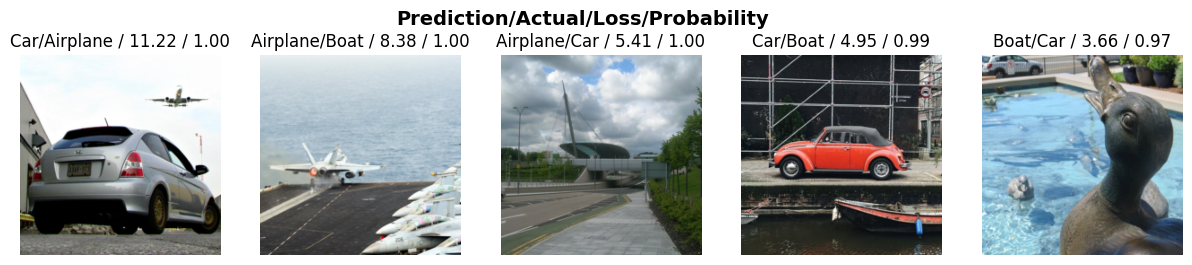

In [ ]:
interp.plot_top_losses(5, nrows=1)

Modelni tekshirish

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
pred, pred_idx, probs = learn.predict(img)
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')
img

Output hidden; open in https://colab.research.google.com to view.

Saqlab olish

In [ ]:
learn.export('transport_model.pkl')

Tekshirish

In [ ]:
model = load_learner('transport_model.pkl')

In [ ]:
model.predict(img)

('Airplane', tensor(0), tensor([9.9999e-01, 9.0247e-08, 1.3133e-05]))